# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE 
from tqdm.auto import tqdm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from tqdm import tqdm
from scipy import optimize
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTETomek
import missingno as msno
from sklearn.decomposition import PCA
import scipy.linalg as la
from copy import deepcopy

In [2]:
#conda install msno

# Data Preparation

### -> Combining Data

##### Since we have data from 5 years, we concatenate them to one final dataframe. 

In [3]:
data = arff.loadarff('1year.arff')
df1 = pd.DataFrame(data[0])

data = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data[0])

data = arff.loadarff('3year.arff')
df3 = pd.DataFrame(data[0])

data = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data[0])

data = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data[0])

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


### -> Data type conversion

In [4]:
#Arrange the data for visualization
#1 Convert the data types of all the columns to float
# Convert the dtypes of all the columns (other than the class label columns) to float.
def convert_columns_type_float(dfs):
    index = 1
    while(index<=63):
        colname = dfs.columns[index]
        col = getattr(dfs, colname)
        dfs[colname] = col.astype(float)
        index+=1
           
convert_columns_type_float(df) 

In [5]:
#2 Convert response variable also to numerical since it is currently alpha numeric
col = df['class'] 
df['class'] = col.astype(int)

# Exploaratory Data Analysis

### -> Data Summary Exploration

In [6]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [7]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


After combining, we see we have data with around 43k records. The statistical properties of each attribute is also given.

### -> Missing Data Exploration

In [8]:
pd.options.display.max_rows = 4000
missing = []
for i in list(df):
    missing.append([i,df[df[i].isnull()].shape[0]])
missing = pd.DataFrame(missing)
missing.columns = ['Feature', 'Mising_value']
missing

,Feature,Mising_value
0,Attr1,8
1,Attr2,8
2,Attr3,8
3,Attr4,134
4,Attr5,89
5,Attr6,8
6,Attr7,8
7,Attr8,94
8,Attr9,9
9,Attr10,8


##### There seems to exist a lot of missing data. We have to further analyze them before modelling.

#### A) Missing Data Exploration (Sparsity Matrix)

<AxesSubplot:>

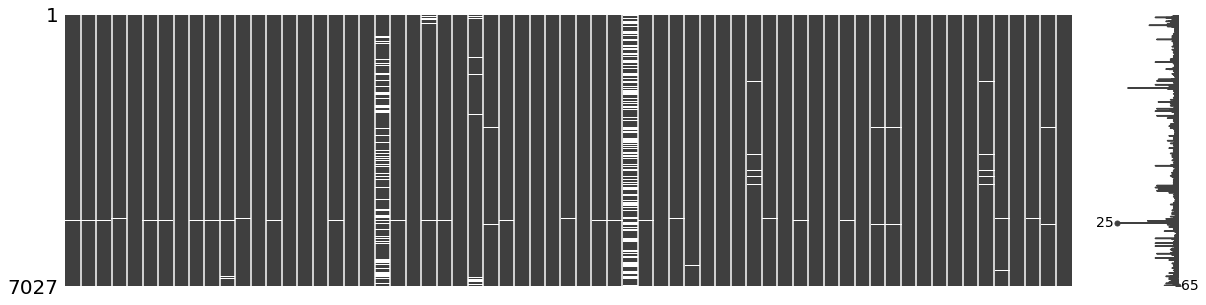

In [9]:
msno.matrix(df1,figsize=(20,5))

<AxesSubplot:>

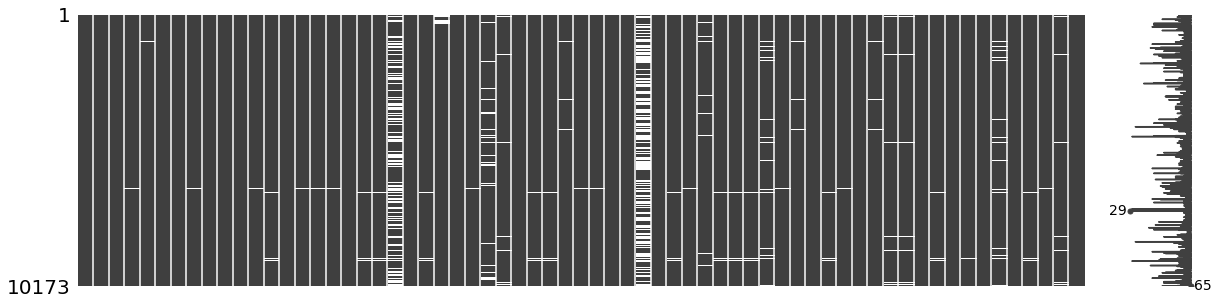

In [10]:
msno.matrix(df2,figsize=(20,5))

<AxesSubplot:>

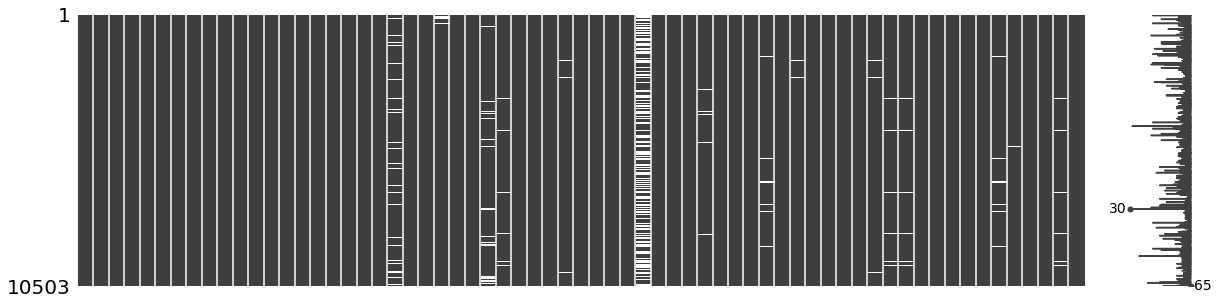

In [11]:
msno.matrix(df3,figsize=(20,5))

<AxesSubplot:>

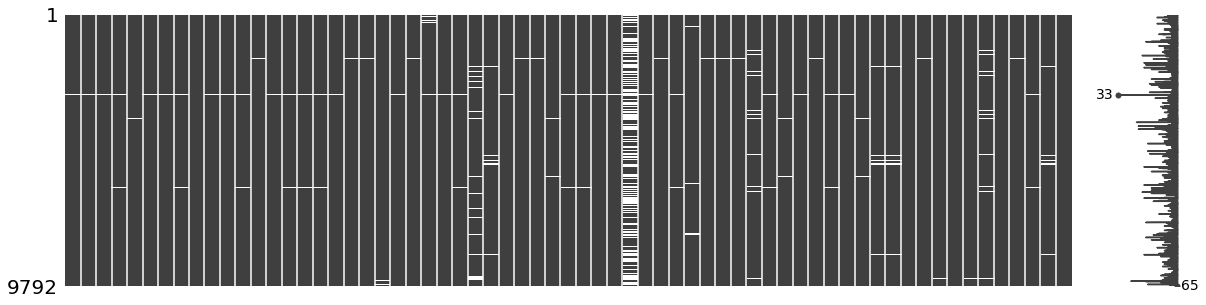

In [12]:
msno.matrix(df4,figsize=(20,5))

<AxesSubplot:>

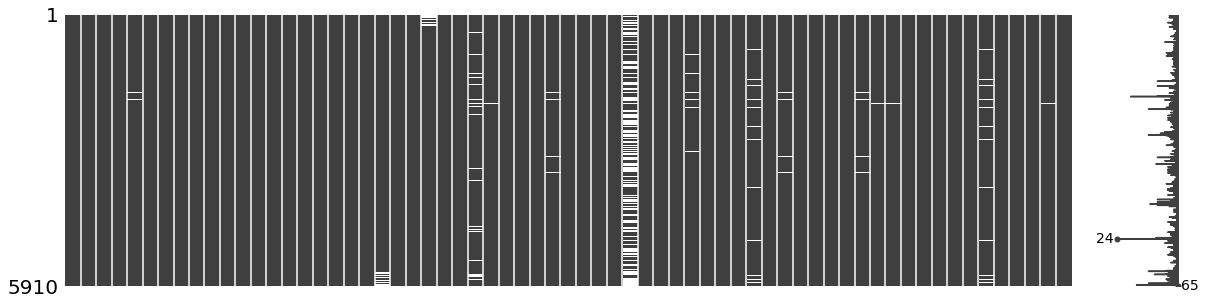

In [13]:
msno.matrix(df5,figsize=(20,5))

##### Attr37 has the most missing values for all years followed by Attr 21. On seeing all the 5 sparsity matrix we could see that almost all the variables have some missing values.

##### Is the missing data missing in a random manner? Or is it missing pairwise ? Or is there any correlation between the missing feature? These questions are unanswered and we have to further analyze them before moelling.

#### B) Missing Data Exploration (Missing data heatmap)

<AxesSubplot:>

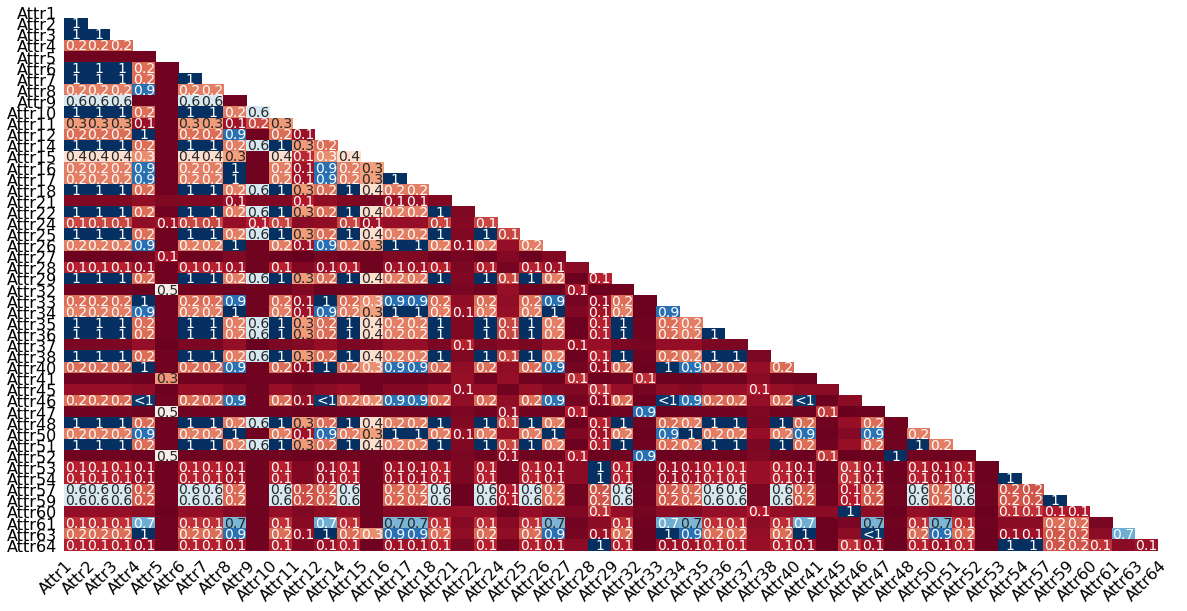

In [14]:
msno.heatmap(df1,figsize=(20,10))

<AxesSubplot:>

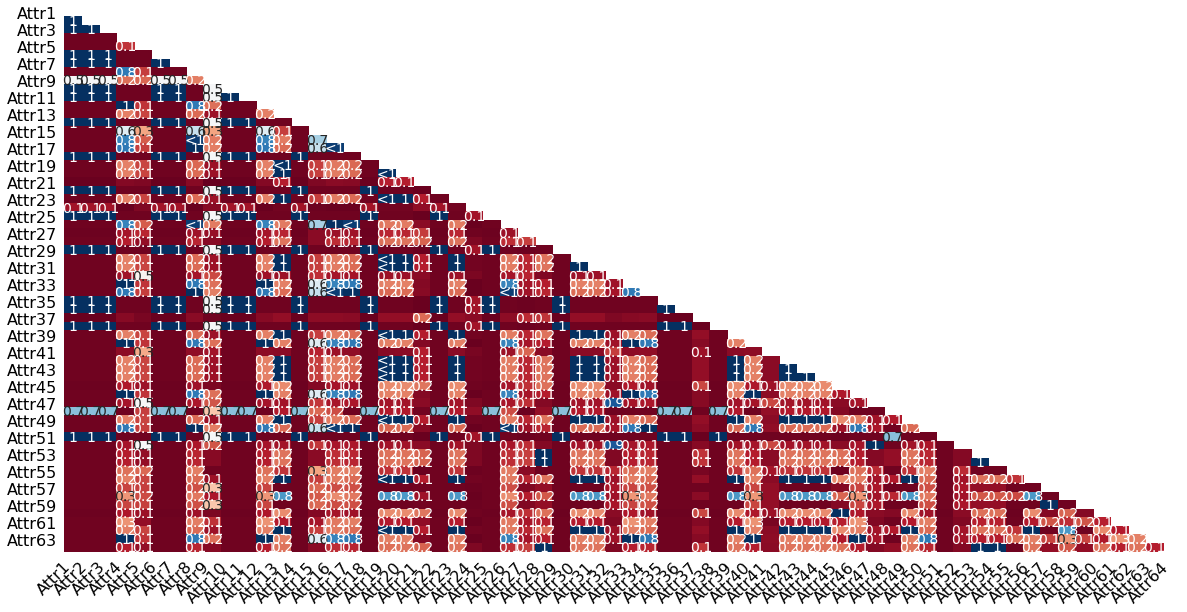

In [15]:
msno.heatmap(df2,figsize=(20,10))

<AxesSubplot:>

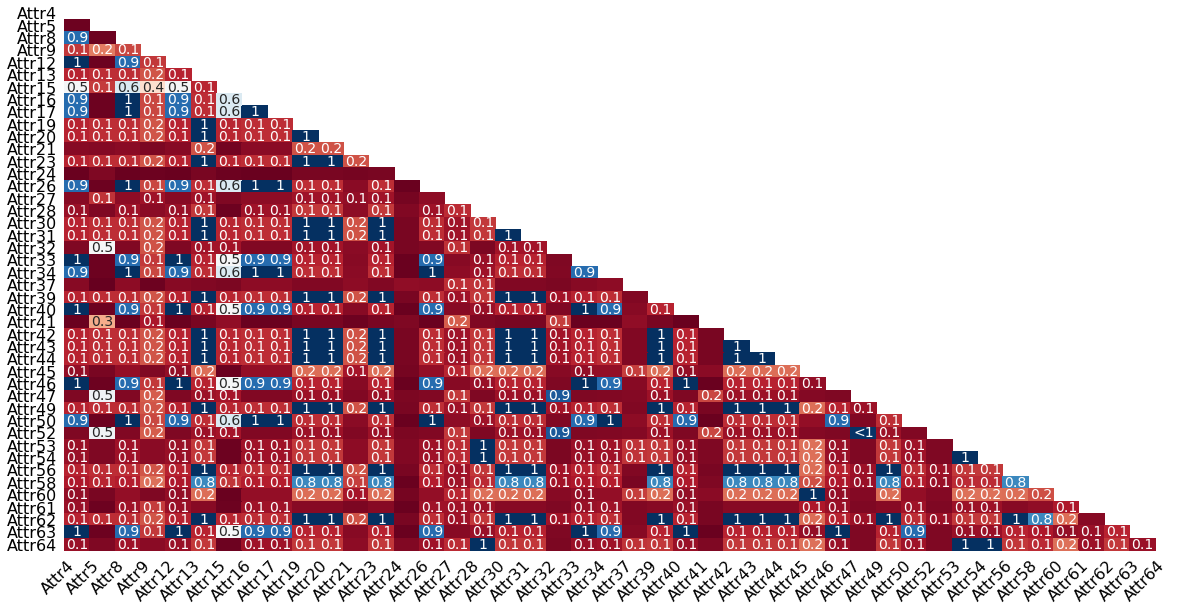

In [16]:
msno.heatmap(df3,figsize=(20,10))

<AxesSubplot:>

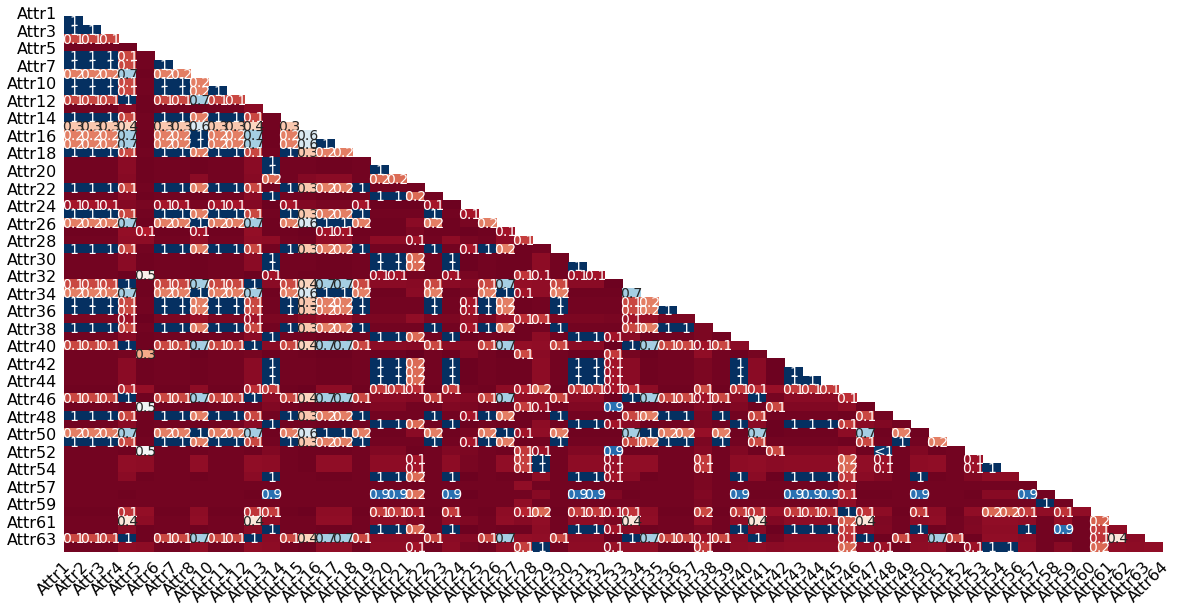

In [17]:
msno.heatmap(df4,figsize=(20,10))

<AxesSubplot:>

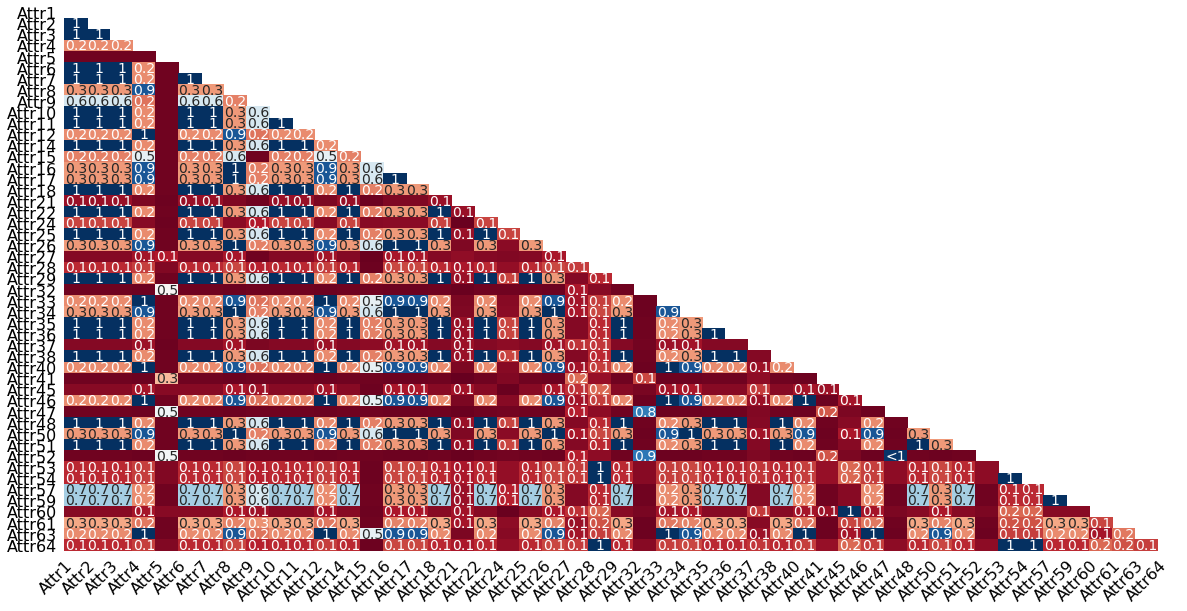

In [18]:
msno.heatmap(df5,figsize=(20,10))

##### There are some variables that are heavily correlated (have corresponding missing values) and also there are features that are not essentially correlated (missing in non-corresponding way)

##### Therefore we cant randomly drop the variables with records with missing values. It would lead to a huge loss of data.

##### Let's do mean imputation.

# Data Processing

### -> Mean Imputation

In [19]:
#Performing mean imputation
def mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imputed_dfs = pd.DataFrame(imputer.fit_transform(df))
    mean_imputed_dfs.columns = dfs.columns
    return mean_imputed_dfs
df = mean_imputation(df)
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


##### Now the data is clean, but we should identify if the data is clean in terms of redundancy. For identifying it, we perform correlation analysis.

### -> Correlation Analysis

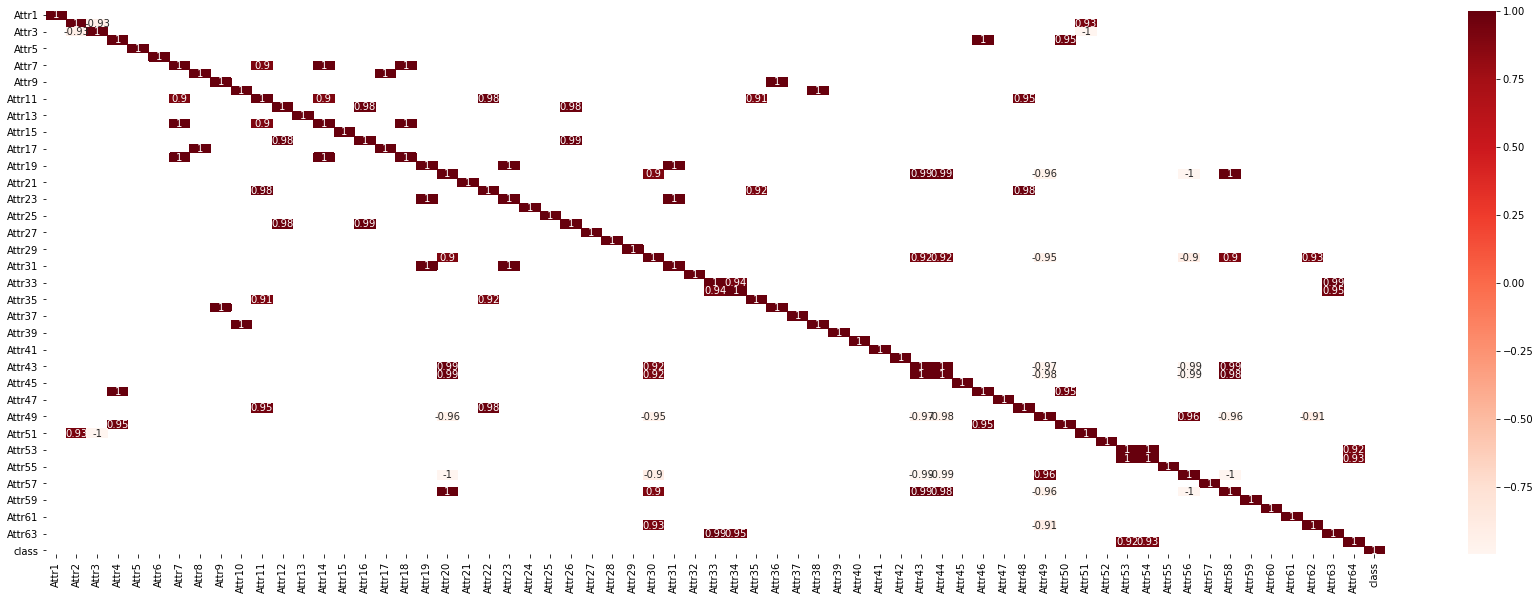

In [20]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9))]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

##### Excluding the diagonal elements, we still see a lot of pairs with higher correlarion. We have chosen a correlation cut off of 0.9 to declare redundancy. So we plan to remove one of the variables among the pairs having correlation greater than 0.9.

In [21]:
# Selecting the Upper trigular matrix
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

        Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
Attr1     NaN  0.104146  0.058037  0.000235  0.002732  0.315139  0.408428   
Attr2     NaN       NaN  0.926983  0.001586  0.036204  0.842916  0.102020   
Attr3     NaN       NaN       NaN  0.002333  0.038761  0.760215  0.033521   
Attr4     NaN       NaN       NaN       NaN  0.001848  0.000046  0.000118   
Attr5     NaN       NaN       NaN       NaN       NaN  0.029196  0.001486   
Attr6     NaN       NaN       NaN       NaN       NaN       NaN  0.016701   
Attr7     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Attr8     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Attr9     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Attr10    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Attr11    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Attr12    NaN       NaN       NaN       NaN       NaN       NaN       NaN   

In [22]:
#selecting the columns with high correlation to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['Attr3', 'Attr11', 'Attr14', 'Attr16', 'Attr17', 'Attr18', 'Attr22', 'Attr23', 'Attr26', 'Attr30', 'Attr31', 'Attr34', 'Attr35', 'Attr36', 'Attr38', 'Attr43', 'Attr44', 'Attr46', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr54', 'Attr56', 'Attr58', 'Attr62', 'Attr63', 'Attr64']


In [23]:
#Dropping the columns
df=df.drop(columns=to_drop,axis=1)
df.head()

#dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)].unstack().sort_values().drop_duplicates()

,Attr1,Attr2,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr12,...,Attr45,Attr47,Attr52,Attr53,Attr55,Attr57,Attr59,Attr60,Attr61,class
0,0.200550,0.37951,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.65980,...,1.00970,49.394,0.25792,2.2437,348690.0,0.39718,0.001924,8.4160,5.1372,0.0
1,0.209120,0.49988,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.51680,...,0.51045,100.130,0.33472,17.8660,2304.6,0.42002,0.000000,4.1486,3.2732,0.0
2,0.248660,0.69592,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.64184,...,0.94807,96.372,0.48474,1.2098,6332.7,0.81774,0.694840,4.9909,3.9510,0.0
3,0.081483,0.30734,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.30163,...,0.28720,84.344,0.25033,2.4524,20545.0,0.14207,0.000000,4.5746,3.6147,0.0
4,0.187320,0.61323,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.33147,...,0.73919,65.936,0.40285,1.8839,3186.6,0.48431,0.124440,6.3985,4.3158,0.0


##### We have now successfully reduced the feature space from 64 variables to 36 variables.

### -> Class Imbalance Check

0.0    41314
1.0     2091
Name: class, dtype: int64
0.0    0.951826
1.0    0.048174
Name: class, dtype: float64


<AxesSubplot:ylabel='class'>

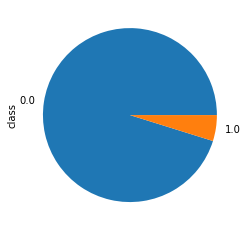

In [24]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize= True))
df['class'].value_counts().plot(kind='pie')

##### The success class has nearly 40000 less records. There is a huge class imbalance. Therefore, we need to do over sampling. But the model has to be tested on the real world proportion between the classes. Therefore, we oversample just the training set.

##### We shall use smote sampling to oversample the data.

##### We shall run 2 cases one with smote sampling, and one without smote sampling to compare the reuslts in case of the baseline model.

# Modelling

# 1) Logistic Regression - baseline model

### -> Class Definition

In [25]:
X = df.drop(['class'], axis=1)
y = df['class']

In [26]:
class LogisticRegression:
    """
    Parameters:
    X-features
    y-target variable
    learningRate-0.000001
    tolerance-0.0001
    """
    
    def __init__(self,X,y, learningRate,tolerance, maxIteration=5000):
        
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
    def normalize(self,X):
        
        '''function to scale the train data'''
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''scale the test data'''
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''add bias to the dataset'''
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    
    def sigmoid(self,z):
        
        '''calculating the probability of belonging to a particular class'''
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        '''returning the cost of the model'''
        
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log-likelihood
        cost=pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        '''calculationg the gradient'''
        
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent (self,X,y):
        
        '''gradient descent algorithm'''
        
        costSequence=[]
        lastCost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w=self.w-self.learningRate*self.gradient(X,y)
            
            currentCost = self.costFunction(X,y)
            diff = lastCost-currentCost
            
            lastCost=currentCost
            costSequence.append(currentCost)
            
            if abs(diff) < self.tolerance:
                print("The Model Stopped - No Further Improvement")
                break
                
        self.plotCost(costSequence)
        
        return
        
    def plotCost(self,costSequence):
        
        '''plot the cost of the model'''
        
        s=np.array(costSequence)
        t=np.arange(s.size)
        
        fig,ax=plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterations',ylabel='cost',title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1),shadow=True)
        plt.show()
        
    def predict(self,X):
        
        '''predicted classes'''
        
        sig=self.sigmoid(X.dot(self.w))
        
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        
        '''performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''run the model'''
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,stratify=self.y,test_size=0.2,random_state=0)
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*1
        self.gradientDescent(self.X_train,self.y_train)
        
       
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('y_test')
        print('Test Accuracy:', accuracy)
        print('Test Precision:', precision)
        print('Test Recall:',recall)
        print('Test f1score:',f1score)
        
        

### -> Running Model

100%|██████████| 5000/5000 [00:14<00:00, 346.45it/s]
No handles with labels found to put in legend.


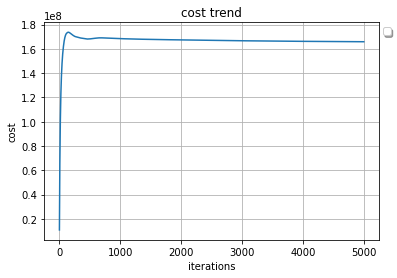

y_train
Training Accuracy: 0.9518488653380947
Training Precision: 0.5263157894736842
Training Recall: 0.005977286312014346
Training f1score: 0.011820330969267141
y_test
Test Accuracy: 0.9515032830319088
Test Precision: 0.3333333333333333
Test Recall: 0.007177033492822967
Test f1score: 0.014051522248243561


In [27]:
logreg=LogisticRegression(X,y,tolerance=0.0001,learningRate=0.00001)
logreg.runModel()

In [28]:
class LogisticRegression_SMOTE:
    
    """
    Parameters:
    X-features
    y-target variable
    learningRate-0.000001
    tolerance-0.0001
    """
    
    def __init__(self,X,y, learningRate,tolerance, maxIteration=10000):
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        
    def normalize(self,X):
        
        '''scale the train data'''
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.addX0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        '''scale the test data'''
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.addX0(X_norm)
        
        return X_norm
        
    
    def addX0(self,X):
        
        '''add bias to the dataset'''
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    
    def sigmoid(self,z):
        
        '''probability of belonging to a particular class'''
        
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        '''cost of the model'''
        
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log-likelihood
        cost=pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        '''calculating the gradient'''
        
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent (self,X,y):
        
        '''gradient descent algorithm'''
        
        costSequence=[]
        lastCost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w=self.w-self.learningRate*self.gradient(X,y)
            
            currentCost = self.costFunction(X,y)
            diff = lastCost-currentCost
            
            lastCost=currentCost
            costSequence.append(currentCost)
            
            if abs(diff) < self.tolerance:
                print("The Model Stopped - No Further Improvement")
                break
                
        self.plotCost(costSequence)
        
        return
        
    def plotCost(self,costSequence):
        
        '''plot the cost of the model'''
        
        s=np.array(costSequence)
        t=np.arange(s.size)
        
        fig,ax=plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterations',ylabel='cost',title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1),shadow=True)
        plt.show()
        
    def predict(self,X):
        
        '''predicted classes'''
        
        sig=self.sigmoid(X.dot(self.w))
        
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        
        '''performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
    
    def runModel(self):
        
        '''run the model'''
        
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,stratify=self.y,test_size=0.2,random_state=0)
        
        #normalizing the data
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        #solving class imbalance using SMOTE
        smote = SMOTETomek(random_state=101)
        self.X_train,self.y_train = smote.fit_resample(self.X_train,self.y_train)
        
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64)*1
        self.gradientDescent(self.X_train,self.y_train)
        
       
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('y_test')
        print('Test Accuracy:', accuracy)
        print('Test Precision:', precision)
        print('Test Recall:',recall)
        print('Test f1score:',f1score)
        
        
        
        

100%|██████████| 10000/10000 [02:05<00:00, 79.84it/s] 
No handles with labels found to put in legend.


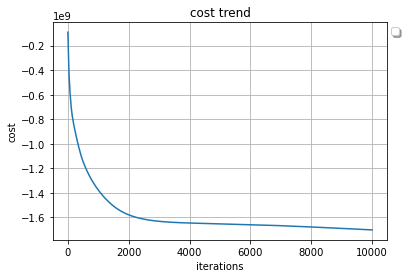

y_train
Training Accuracy: 0.6652498476538696
Training Precision: 0.6821005271463587
Training Recall: 0.6189823278488726
Training f1score: 0.6490104308100252
y_test
Test Accuracy: 0.7045271282110356
Test Precision: 0.10196514645902854
Test Recall: 0.6578947368421053
Test f1score: 0.17656500802568217


In [29]:
logreg_smote=LogisticRegression_SMOTE(X,y,tolerance=0.0001,learningRate=0.00001)
logreg_smote.runModel()

# B) SVM

##### Since SVM deesn't work well with large data set, and since we have target class in unequal proportion, we are planning to undersample the data.

### -> Undersampling the data

In [30]:
b0=df1[df1['class'] == b'0'].sample(n=len(df1[df1['class'] == b'1'])
                                     ,random_state=2)
b1=df1[df1['class'] == b'1']
df_1= pd.concat([b0,b1], ignore_index=True)


b0=df2[df2['class'] == b'0'].sample(n=len(df2[df2['class'] == b'1'])
                                     ,random_state=2)
b1=df2[df2['class'] == b'1']
df_2= pd.concat([b0,b1], ignore_index=True)



b0=df3[df3['class'] == b'0'].sample(n=len(df3[df3['class'] == b'1'])
                                     ,random_state=2)
b1=df3[df3['class'] == b'1']
df_3= pd.concat([b0,b1], ignore_index=True)



b0=df4[df4['class'] == b'0'].sample(n=len(df4[df4['class'] == b'1'])
                                     ,random_state=2)
b1=df4[df4['class'] == b'1']
df_4= pd.concat([b0,b1], ignore_index=True)



b0=df5[df5['class'] == b'0'].sample(n=len(df5[df5['class'] == b'1'])
                                     ,random_state=2)
b1=df5[df5['class'] == b'1']
df_5= pd.concat([b0,b1], ignore_index=True)


df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)



###DATATYPE CONVERSION

convert_columns_type_float(df) 

col = df['class'] 
df['class'] = col.astype(int)

### Mean imputation for null
df = mean_imputation(df)

##### We also performed PCA to reduce the dimensions in order to increase the speed of training.

### -> PCA

In [31]:
########Normalize
X = df.drop(['class'], axis=1)
y = df['class']
mean=np.mean(X)
std=np.std(X)
X=(X-mean)/std
X['class'] = y
df = deepcopy(X)


########## PCA

pca = PCA(n_components=64)
pca.fit(X)

var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

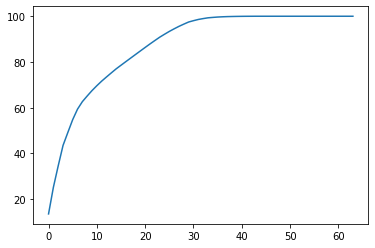

In [32]:
plt.plot(var1)

##### We chose 30 components, as we got almost 100% explained variance with 30 components.

In [33]:
pca = PCA(n_components=30)
pcs = pca.fit(X)
components = pcs.transform(X)

X_temp = pd.DataFrame(components)

### -> Class definition

In [ ]:
class SoftMarginSVM:
    
    """
    Parameters:
    X-features
    y-target variable
    alpha-lagrangian multiplier
    w-weights(parameters which are learnt)
    C-regularization term
    """
    
    def __init__(self,X,y,C):
        self.alpha = None
        self.w = None
        self.supportVectors = None
        self.X=X
        self.y=y
        self.C = C

    
                

    def fit(self, X, y):
        
        '''fitting the model'''

        N = len(y)

        # Gram matrix of (X,y)
        Xy = X*y[:,np.newaxis] 

        GramXy = np.matmul(Xy,Xy.T) 
    
        def Ld0(G, alpha): 
            
            '''the dual form of SVM'''
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))

            return obj_fn
        

            # Derivative of Lagrangian Function
        def partialDerivationLd0(G, alpha):
            
            '''derivative of lagrangian function'''
            
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der

        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun':lambda a: np.dot(a,y), 'jac': lambda a: y },
                    {'type': 'ineq', 'fun':lambda a: b - np.dot(A, a), 'jac': lambda a: -A}) 

        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                x0 = alpha,
                                method = 'SLSQP',
                                jac = lambda a: - partialDerivationLd0(GramXy, a),
                                constraints = constraints)
        
        self.alpha = optRes.x


        self.w =  np.sum(( self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4
        self.supportVectors = X[ self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]


        self.b1 = self.supportLabels[0] - np.matmul(self.supportVectors[0].T, self.w)
        
        b = []
        for i in tqdm(range(len(self.supportLabels))):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append( b_i )
        
        self.b2 = sum(b)/len(b)
        
        self.intercept = self.b2
        
            
    def predict(self, X):
        
        '''predicted classes'''
    
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1
    
    def evaluate(self,y,y_hat):
        
        '''performance of the model'''
        
        y=(y==1)
        y_hat=(y_hat == 1)
        
        accuracy= ( y == y_hat).sum()/y.size
        precision=(y & y_hat).sum() /y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        f1score=2*(precision*recall)/(precision+recall)
        
        return accuracy,precision,recall,f1score
        
    def runModel(self):
        
        '''run the model'''

        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        self.fit(self.X_train,self.y_train)
        
        y_hat_train = self.predict(self.X_train)
        accuracy,precision,recall,f1score=self.evaluate(self.y_train,y_hat_train)
        print('This is for y_train')
        print('Training Accuracy:', accuracy)
        print('Training Precision:', precision)
        print('Training Recall:',recall)
        print('Training f1score:',f1score)
        
        y_hat_test = self.predict(self.X_test)
        accuracy,precision,recall,f1score=self.evaluate(self.y_test,y_hat_test)
        print('This is for y_test')
        print('Test Accuracy:', accuracy)
        print('Test Precision:', precision)
        print('Test Recall:',recall)
        print('Test f1score:',f1score)
        

### -> Running Model

In [36]:
model = SoftMarginSVM(X_temp.values,y.values,C=1)
model.runModel()

100%|██████████| 1668/1668 [00:00<00:00, 441394.26it/s]

This is for y_train
Training Accuracy: 0.3937219730941704
Training Precision: 0.33010648596321396
Training Recall: 0.20333929636255219
Training f1score: 0.2516605166051661
This is for y_test
Test Accuracy: 0.4026284348864994
Test Precision: 0.3442028985507246
Test Recall: 0.22946859903381642
Test f1score: 0.27536231884057966
